

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [30]:
import pandas as pd

data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)
quantity = data['sex'].value_counts()
print('Мужчин:\n', quantity[0], '\nЖенщин:\n', quantity[1],)

Мужчин:
 21790 
Женщин:
 10771


### Вопрос 2
Каков средний возраст мужчин?


In [18]:
import pandas as pd

data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

male = data[data['sex'] == 'Male']
male['age'].mean()

39.43354749885268

### Вопрос 3
Какова доля граждан США?

In [20]:
import pandas as pd

data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

filter_large = data['native-country'] == 'United-States'
a = data.loc[filter_large].shape 
b = data.shape
print(a[0] / b[0])

0.895857006848684


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

для удобства увеличен шрифт надписей и размер гистограммы, также значения абсцисы повернуты на 45 градусов (для читаемости)


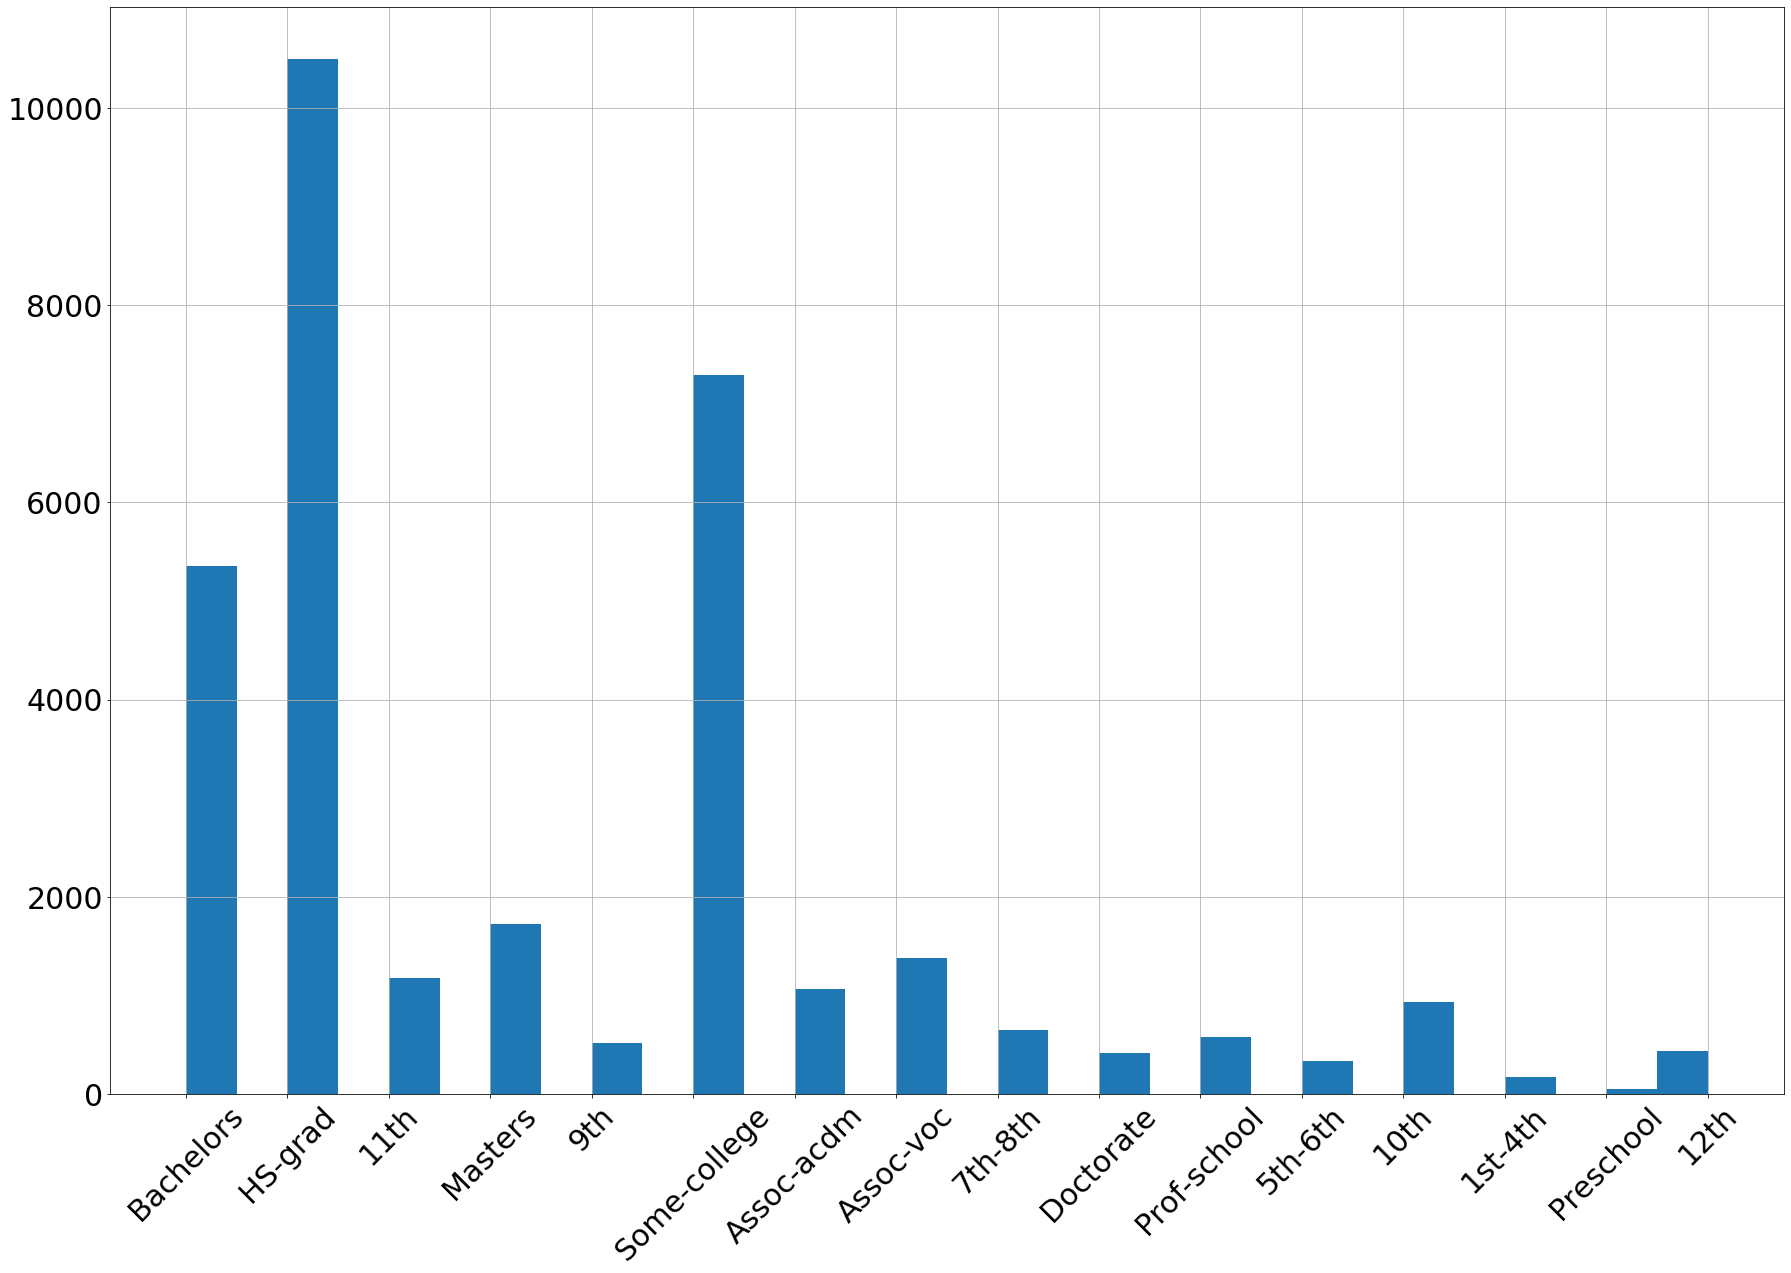

In [22]:
import pandas as pd

data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

data.education.hist(bins = 30,  figsize=(30,20), xlabelsize = 30, ylabelsize = 30, xrot = 45)
print('для удобства увеличен шрифт надписей и размер гистограммы, также значения абсцисы повернуты на 45 градусов (для читаемости)')

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [54]:
import pandas as pd

data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

standart = data.groupby('marital-status')['fnlwgt'].std().Divorced
average=data.groupby('marital-status')['fnlwgt'].mad().Divorced
print("Среднее:\n", average, "\nСтандартное:\n", standart)

Среднее:
 75755.37971106575 
Стандартное:
 105646.78945933616


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [86]:
import pandas as pd

data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

univer = data['education'] == ('Bachelors' or 'Masters' or 'Doctorate')
no_univer = data['education'] != ('Bachelors' or 'Masters' or 'Doctorate')
more_k = data['50K'] == '>50K'
k_univer = data.loc[univer & more_k].shape
k_no_univer = data.loc[no_univer & more_k].shape

if k_univer[0] > k_no_univer[0]:
    print('Большая часть людей с зарплатой 50K имеет высшее образование.')
else:
    print('Большая часть людей с зарплатой 50K не имеет высшего образования.')  

print('\nЛюди с зарплатой 50K:\n\nС высшим образованием:\n', k_univer[0], '\nБез высшего образования:\n' ,k_no_univer[0])

Большая часть людей с зарплатой 50K не имеет высшего образования
Люди с зарплатой 50K:

С высшим образованием:
 2221 
Без высшего образования:
 5620


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [74]:
import pandas as pd

data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

male = data[data['sex'] == 'Male'].groupby('race').max().age
female = data[data['sex'] == 'Female'].groupby('race').max().age
print("Мужчины:\n", male, "\n\nЖенщины:\n", female)

Мужчины:
 race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64 

Женщины:
 race
Amer-Indian-Eskimo    80
Asian-Pac-Islander    75
Black                 90
Other                 74
White                 90
Name: age, dtype: int64


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?



P.S Не знаю откуда взялся "?", возможно так обозначается неизвестная страна (я ее так и отметил)

In [55]:
import pandas as pd

data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

education_filter = data['occupation'] == 'Farming-fishing'
a = data.loc[filter1]
arr = a['native-country'].unique()

for row in arr:
    if row != '?':
        print(*row)
    else:
        print('Unknown country')

U n i t e d - S t a t e s
C u b a
I n d i a
G e r m a n y
P h i l i p p i n e s
P o l a n d
I r a n
Unknown country
C a n a d a
H o n d u r a s
E n g l a n d
C h i n a
M e x i c o
T a i w a n
J a p a n
J a m a i c a
I t a l y
N i c a r a g u a
C a m b o d i a
S o u t h
V i e t n a m
H o n g
E l - S a l v a d o r
P u e r t o - R i c o
P e r u
F r a n c e
I r e l a n d
O u t l y i n g - U S ( G u a m - U S V I - e t c )
G r e e c e
P o r t u g a l
D o m i n i c a n - R e p u b l i c
T h a i l a n d
E c u a d o r
H a i t i
Y u g o s l a v i a
H u n g a r y
C o l u m b i a
G u a t e m a l a
L a o s
S c o t l a n d


### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [63]:
import pandas as pd

data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

sex_filter_male = data['sex'] == 'Male'
sex_filter_female = data['sex'] == 'Female'
education_filter_bachelors = data['education'] == 'Bachelors'
education_filter_masters = data['education'] == 'Masters'

quantity_male_bacherlors = data.loc[sex_filter_male & education_filter_bachelors].shape 
quantity_male_masters =  data.loc[sex_filter_male & education_filter_masters].shape 
quantity_female_bacherlors = data.loc[sex_filter_female & education_filter_bachelors].shape 
quantity_female_masters = data.loc[sex_filter_female & education_filter_masters].shape 

male_coef = quantity_male_bacherlors[0] / quantity_male_masters[0]
female_coef = quantity_female_bacherlors[0] / quantity_female_masters[0]
print('Отношение количества мужчин-бакалавров к количеству мужчин-магистров:\n', male_coef, 
      '\n\nОтношение количества женщин-бакалавров к количеству женщин-магистров\n', female_coef)

if male_coef > female_coef:
    print('\nОтношение мужчин больше')
else:
    print('\nОтношение женщин больше')

Отношение количества мужчин-бакалавров к количеству мужчин-магистров:
 3.14743049705139 

Отношение количества женщин-бакалавров к количеству женщин-магистров
 3.0205223880597014

Отношение мужчин больше


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

Максимальное количество рабочих часов: 99
Кол-во людей работающих столько часов в неделю: 85 
Данные по их заработку:


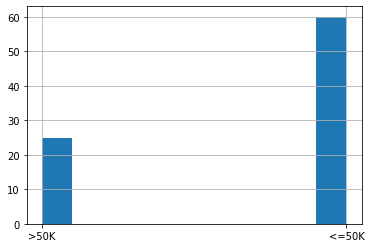

In [105]:
import pandas as pd

data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

maxh=data['hours-per-week'].max()
print('Максимальное количество рабочих часов:', maxh)
people=data[data['hours-per-week']==maxh]['50K'].count();
print('Кол-во людей работающих столько часов в неделю:', people, '\nДанные по их заработку:')
data[data['hours-per-week']==maxh]['50K'].hist()